# Trade of goods , US$, HS 1992, ALL COMMODITIES

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Trade of goods , US$, HS 1992, ALL COMMODITIES.csv')

df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2018,ALL COMMODITIES,Import,7.406590e+09,NaN,No Quantity,0.0
1,Afghanistan,2018,ALL COMMODITIES,Export,8.845045e+08,0.0,No Quantity,0.0
2,Afghanistan,2018,ALL COMMODITIES,Re-Export,9.263097e+06,0.0,No Quantity,0.0
3,Afghanistan,2016,ALL COMMODITIES,Import,6.534140e+09,NaN,No Quantity,NaN
4,Afghanistan,2016,ALL COMMODITIES,Export,5.964553e+08,NaN,No Quantity,NaN
...,...,...,...,...,...,...,...,...
10139,Zimbabwe,2001,ALL COMMODITIES,Export,1.206663e+09,NaN,No Quantity,NaN
10140,Zimbabwe,2001,ALL COMMODITIES,Re-Export,1.594229e+07,NaN,No Quantity,NaN
10141,Zimbabwe,2000,ALL COMMODITIES,Export,1.879631e+09,NaN,No Quantity,NaN
10142,Zimbabwe,1995,ALL COMMODITIES,Import,2.658853e+09,NaN,No Quantity,NaN


In [5]:
df.shape

(10144, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10144 entries, 0 to 10143
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  10144 non-null  object 
 1   Year             10144 non-null  int64  
 2   Commodity        10144 non-null  object 
 3   Flow             10144 non-null  object 
 4   Trade (USD)      10144 non-null  float64
 5   Weight (kg)      983 non-null    float64
 6   Quantity Name    10144 non-null  object 
 7   Quantity         1437 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 634.1+ KB


In [7]:
df.rename(columns={'Country or Area': 'Country_or_Area'}, inplace=True)

df.head()

,Country_or_Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2018,ALL COMMODITIES,Import,7.406590e+09,NaN,No Quantity,0.0
1,Afghanistan,2018,ALL COMMODITIES,Export,8.845045e+08,0.0,No Quantity,0.0
2,Afghanistan,2018,ALL COMMODITIES,Re-Export,9.263097e+06,0.0,No Quantity,0.0
3,Afghanistan,2016,ALL COMMODITIES,Import,6.534140e+09,NaN,No Quantity,NaN
4,Afghanistan,2016,ALL COMMODITIES,Export,5.964553e+08,NaN,No Quantity,NaN


In [8]:
df1 = df[['Country_or_Area', 'Year', 'Commodity', 'Flow', 'Trade (USD)']]

df1.head()

,Country_or_Area,Year,Commodity,Flow,Trade (USD)
0,Afghanistan,2018,ALL COMMODITIES,Import,7.406590e+09
1,Afghanistan,2018,ALL COMMODITIES,Export,8.845045e+08
2,Afghanistan,2018,ALL COMMODITIES,Re-Export,9.263097e+06
3,Afghanistan,2016,ALL COMMODITIES,Import,6.534140e+09
4,Afghanistan,2016,ALL COMMODITIES,Export,5.964553e+08


In [9]:
df1['Trade (USD)'].describe()

count    1.014400e+04
mean     6.693166e+10
std      2.112641e+11
min      2.000000e+00
25%      4.379713e+08
50%      4.022039e+09
75%      3.381102e+10
max      2.611432e+12
Name: Trade (USD), dtype: float64

In [10]:
df1.describe(include='object')

,Country_or_Area,Commodity,Flow
count,10144,10144,10144
unique,210,1,4
top,Canada,ALL COMMODITIES,Import
freq,98,10144,4173


# Missing Values Exploration

In [11]:
df1.isna().any()                      # no missing values

Country_or_Area    False
Year               False
Commodity          False
Flow               False
Trade (USD)        False
dtype: bool

In [12]:
df1.isna().sum()

Country_or_Area    0
Year               0
Commodity          0
Flow               0
Trade (USD)        0
dtype: int64

In [13]:
df1['Country_or_Area'].value_counts()

Canada         98
Thailand       98
New Zealand    97
Cyprus         95
Australia      93
               ..
Djibouti        3
Eritrea         3
Cayman Isds     2
Tajikistan      2
Chad            1
Name: Country_or_Area, Length: 210, dtype: int64

In [14]:
df1['Flow'].value_counts()

Import       4173
Export       4156
Re-Export    1156
Re-Import     659
Name: Flow, dtype: int64

# Grouping and Aggregation

In [15]:
country_area_grouped = df1.groupby('Country_or_Area')
country_area_grouped.head()

,Country_or_Area,Year,Commodity,Flow,Trade (USD)
0,Afghanistan,2018,ALL COMMODITIES,Import,7.406590e+09
1,Afghanistan,2018,ALL COMMODITIES,Export,8.845045e+08
2,Afghanistan,2018,ALL COMMODITIES,Re-Export,9.263097e+06
3,Afghanistan,2016,ALL COMMODITIES,Import,6.534140e+09
4,Afghanistan,2016,ALL COMMODITIES,Export,5.964553e+08
...,...,...,...,...,...
10100,Zimbabwe,2018,ALL COMMODITIES,Import,6.258856e+09
10101,Zimbabwe,2018,ALL COMMODITIES,Export,4.037203e+09
10102,Zimbabwe,2017,ALL COMMODITIES,Import,4.962103e+09
10103,Zimbabwe,2017,ALL COMMODITIES,Export,3.480382e+09


# Trade (USD) Exploration

In [16]:
agg_trade_stats = country_area_grouped.agg(
    min_trade = pd.NamedAgg('Trade (USD)', 'min'),
    mean_trade = pd.NamedAgg('Trade (USD)', 'mean'),
    max_trade = pd.NamedAgg('Trade (USD)', 'max'),
    total_trade = pd.NamedAgg('Trade (USD)', 'sum')
)

agg_trade_stats

,min_trade,mean_trade,max_trade,total_trade
Country_or_Area,,,,
Afghanistan,9.263097e+06,3.204996e+09,8.554414e+09,6.730491e+10
Albania,6.792000e+03,1.860073e+09,5.941287e+09,1.060241e+11
Algeria,2.272710e+05,2.962302e+10,7.929759e+10,1.599643e+12
Andorra,1.301725e+05,5.985092e+08,1.939930e+09,3.471354e+10
Angola,3.920000e+02,3.173247e+10,7.086308e+10,7.615793e+11
...,...,...,...,...
Viet Nam,1.448274e+10,8.322834e+10,2.151186e+11,2.996220e+12
Wallis and Futuna Isds,3.258690e+07,4.423441e+07,5.720028e+07,3.096408e+08
Yemen,4.505609e+07,4.752300e+09,1.327293e+10,1.758351e+11


In [17]:
agg_trade_stats['total_trade'].sort_values(ascending=False).head(10)                 # top ten country or area with the highest trade in dollars

Country_or_Area
USA                     7.466925e+13
EU-28                   6.601481e+13
China                   5.282041e+13
Germany                 4.845993e+13
Japan                   3.280613e+13
China, Hong Kong SAR    2.567542e+13
United Kingdom          2.273016e+13
France                  2.269440e+13
Canada                  1.911553e+13
Italy                   1.883860e+13
Name: total_trade, dtype: float64

[Text(0.5, 0, 'Trade ($)'),
 Text(0, 0.5, 'Country or Area'),
 Text(0.5, 1.0, 'Trade of Goods (All Commodities)')]

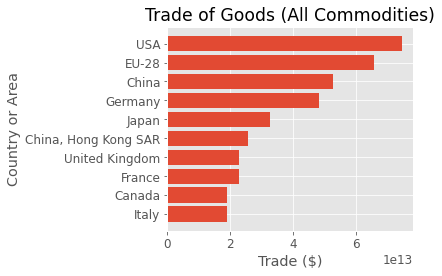

In [18]:
top_10_trade = agg_trade_stats['total_trade'].sort_values(ascending=False).head(10)

fig, ax = plt.subplots()

ax.barh(top_10_trade.keys(), top_10_trade.values, align='center')
ax.invert_yaxis()                                                       # labels read top-to-bottom
ax.set(xlabel='Trade ($)', ylabel='Country or Area', title='Trade of Goods (All Commodities)')

In [19]:
agg_trade_stats['total_trade'].sort_values(ascending=True).head(10)

Country_or_Area
Tuvalu                    1.037393e+08
Chad                      2.151683e+08
Wallis and Futuna Isds    3.096408e+08
Guinea-Bissau             3.715047e+08
Eritrea                   4.404139e+08
Montserrat                5.151449e+08
Cook Isds                 7.659912e+08
Haiti                     9.398224e+08
Anguilla                  1.170307e+09
Djibouti                  1.217550e+09
Name: total_trade, dtype: float64

[Text(0.5, 0, 'Trade ($)'),
 Text(0, 0.5, 'Country or Area'),
 Text(0.5, 1.0, 'Trade of Goods (All Commodities)')]

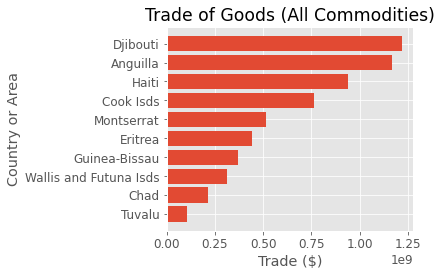

In [20]:
low_10_trade = agg_trade_stats['total_trade'].sort_values(ascending=True).head(10)

fig, ax = plt.subplots()

hbars = ax.barh(low_10_trade.keys(), low_10_trade.values, align='center')
ax.set(xlabel='Trade ($)', ylabel='Country or Area', title='Trade of Goods (All Commodities)')

# USA Exploration

In [21]:
df_USA = country_area_grouped[['Year', 'Flow', 'Trade (USD)']].get_group('USA')
df_USA

,Year,Flow,Trade (USD)
9816,2018,Import,2.611432e+12
9817,2018,Export,1.665303e+12
9818,2018,Re-Export,2.520493e+11
9819,2017,Import,2.405277e+12
9820,2017,Export,1.545810e+12
...,...,...,...
9895,1992,Export,4.473301e+11
9896,1992,Re-Export,2.245862e+10
9897,1991,Import,5.089440e+11
9898,1991,Export,4.215554e+11


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Trade (USD)')]

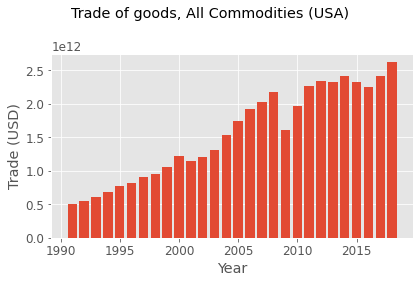

In [22]:
x = df_USA['Year']
y = df_USA['Trade (USD)']
z = df_USA['Flow']

fig, ax = plt.subplots()
fig.suptitle('Trade of goods, All Commodities (USA)')

ax.bar(x, y)
ax.set(xlabel='Year', ylabel='Trade (USD)')

[Text(0.5, 0, 'Flow'), Text(0, 0.5, 'Trade (USD)')]

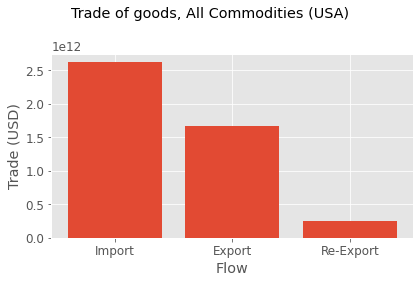

In [23]:
fig, ax = plt.subplots()
fig.suptitle('Trade of goods, All Commodities (USA)')

ax.bar(z, y)
ax.set(xlabel='Flow', ylabel='Trade (USD)')